<a href="https://colab.research.google.com/github/ajaykumar6666/Data-Science/blob/master/Breast%20Cancer%20Prediction%20using%20TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [5]:
tf.eye(3,3)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)>

In [6]:
tf.__version__

'2.3.0'

In [7]:
from sklearn.datasets import load_breast_cancer

In [14]:
data=load_breast_cancer()

In [15]:
type(data)

sklearn.utils.Bunch

In [16]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [17]:
data['data']

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test=train_test_split(data.data,data.target,test_size=0.33)

In [20]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((381, 30), (188, 30), (381,), (188,))

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler=StandardScaler()

In [23]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [25]:
N,D=X_train.shape

In [26]:
N,D

(381, 30)

In [28]:
model=tf.keras.models.Sequential(
    [tf.keras.layers.Input(shape=(D,)),
     tf.keras.layers.Dense(1,activation='sigmoid')]
)

In [29]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [32]:
r=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
12/12 [==============================] - 0s 5ms/step - loss: 0.1081 - accuracy: 0.9764 - val_loss: 0.1340 - val_accuracy: 0.9521
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 0.1074 - accuracy: 0.9764 - val_loss: 0.1333 - val_accuracy: 0.9521
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 0.1067 - accuracy: 0.9764 - val_loss: 0.1328 - val_accuracy: 0.9521
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 0.1060 - accuracy: 0.9764 - val_loss: 0.1320 - val_accuracy: 0.9521
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 0.1054 - accuracy: 0.9764 - val_loss: 0.1314 - val_accuracy: 0.9521
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 0.1047 - accuracy: 0.9764 - val_loss: 0.1307 - val_accuracy: 0.9521
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 0.1041 - accuracy: 0.9764 - val_loss: 0.1301 - val_accuracy: 0.9521
Epoch 8/100
1

In [31]:
print('train score: ',model.evaluate(X_train,y_train))
print('test score: ',model.evaluate(X_test,y_test))

12/12 [==============================] - 0s 1ms/step - loss: 0.1084 - accuracy: 0.9764
train score:  [0.10838999599218369, 0.9763779640197754]
6/6 [==============================] - 0s 1ms/step - loss: 0.1347 - accuracy: 0.9521
test score:  [0.13466152548789978, 0.9521276354789734]


In [33]:
import matplotlib.pyplot as plt


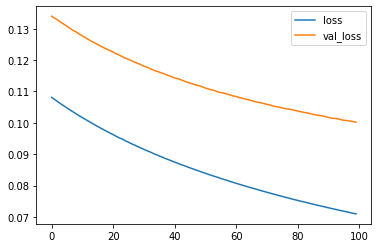

In [36]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

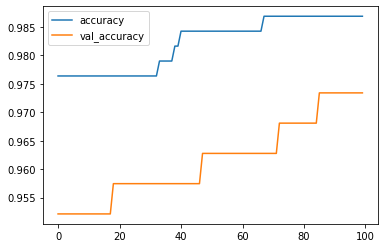

In [37]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()